In [254]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics

In [255]:
df=pd.read_csv('/Users/da_learner_mac_45/Downloads/South_Africa_2020-08-01_to_2023-04-10-1.csv')
df.head(5)

,Unnamed: 0,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,sunset,moonphase,conditions,description,icon,stations,conditions_code,description_code,icon_code,cluster
0,0,South Africa,2020-08-01 00:00:00,24.3,4.1,13.6,24.3,3.5,13.4,-4.0,...,2020-08-01 17:41:55,0.42,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630...",0,13,0,0
1,1,South Africa,2020-08-02 00:00:00,25.0,4.8,14.5,25.0,3.9,14.4,-2.1,...,2020-08-02 17:42:24,0.46,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630...",0,13,0,0
2,2,South Africa,2020-08-03 00:00:00,23.4,4.1,13.3,23.4,4.1,13.2,-0.3,...,2020-08-03 17:42:52,0.50,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630...",0,13,0,0
3,3,South Africa,2020-08-04 00:00:00,23.8,2.8,12.7,23.8,2.8,12.5,-2.8,...,2020-08-04 17:43:21,0.52,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630...",0,13,0,0
4,4,South Africa,2020-08-05 00:00:00,24.3,4.0,14.0,24.3,4.0,13.9,-2.2,...,2020-08-05 17:43:49,0.56,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630...",0,13,0,0


In [256]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        983 non-null    int64  
 1   name              983 non-null    object 
 2   datetime          983 non-null    object 
 3   tempmax           983 non-null    float64
 4   tempmin           983 non-null    float64
 5   temp              983 non-null    float64
 6   feelslikemax      983 non-null    float64
 7   feelslikemin      983 non-null    float64
 8   feelslike         983 non-null    float64
 9   dew               983 non-null    float64
 10  humidity          983 non-null    float64
 11  precip            983 non-null    float64
 12  precipprob        983 non-null    int64  
 13  precipcover       983 non-null    float64
 14  snow              983 non-null    int64  
 15  snowdepth         983 non-null    int64  
 16  windgust          982 non-null    float64
 1

In [257]:
df.columns

Index(['Unnamed: 0', 'name', 'datetime', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'stations',
       'conditions_code', 'description_code', 'icon_code', 'cluster'],
      dtype='object')

In [258]:
df.describe()


,Unnamed: 0,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,conditions_code,description_code,icon_code,cluster
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,...,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,491.000000,25.860936,11.990641,18.312208,25.504273,11.704069,18.136826,8.982096,59.713632,2.851523,...,34.502747,13.101628,180.045473,15.535097,7.250254,0.481872,1.989827,22.482197,1.147508,0.922686
std,283.911958,4.559974,4.904762,4.216539,4.161045,5.329601,4.311046,6.228631,15.694793,8.698552,...,25.868935,1.759234,64.481183,5.577203,2.025408,0.287676,1.781295,9.571121,0.872534,0.703587
min,0.000000,12.300000,-2.100000,5.700000,12.300000,-6.500000,4.000000,-12.000000,16.300000,0.000000,...,0.000000,7.900000,19.500000,1.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,245.500000,22.700000,8.100000,15.000000,22.700000,7.200000,15.000000,4.200000,48.000000,0.000000,...,9.850000,11.800000,133.750000,11.500000,6.000000,0.250000,0.000000,13.000000,0.000000,0.000000
50%,491.000000,26.400000,13.500000,19.100000,26.300000,13.500000,19.100000,10.900000,61.600000,0.000000,...,33.800000,13.200000,174.900000,15.100000,7.000000,0.500000,1.000000,26.000000,1.000000,1.000000
75%,736.500000,29.200000,15.800000,21.500000,28.600000,15.800000,21.500000,14.000000,70.950000,0.800000,...,56.000000,14.350000,227.500000,19.600000,9.000000,0.740000,4.000000,32.000000,2.000000,1.000000
max,982.000000,37.100000,20.000000,26.700000,36.100000,20.000000,25.600000,18.800000,94.100000,91.024000,...,98.500000,17.400000,358.200000,30.900000,10.000000,0.980000,5.000000,33.000000,2.000000,2.000000


In [259]:
df.shape

(983, 36)

In [260]:
df.isnull().sum()

Unnamed: 0          0
name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
snow                0
snowdepth           0
windgust            1
windspeed           0
winddir             0
sealevelpressure    2
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
conditions_code     0
description_code    0
icon_code           0
cluster             0
dtype: int64

In [261]:
df['windgust'].fillna(df['windgust'].mean(), inplace=True)
df['sealevelpressure'].fillna(df['sealevelpressure'].mean(), inplace=True)
df.isnull().sum()

Unnamed: 0          0
name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
conditions_code     0
description_code    0
icon_code           0
cluster             0
dtype: int64

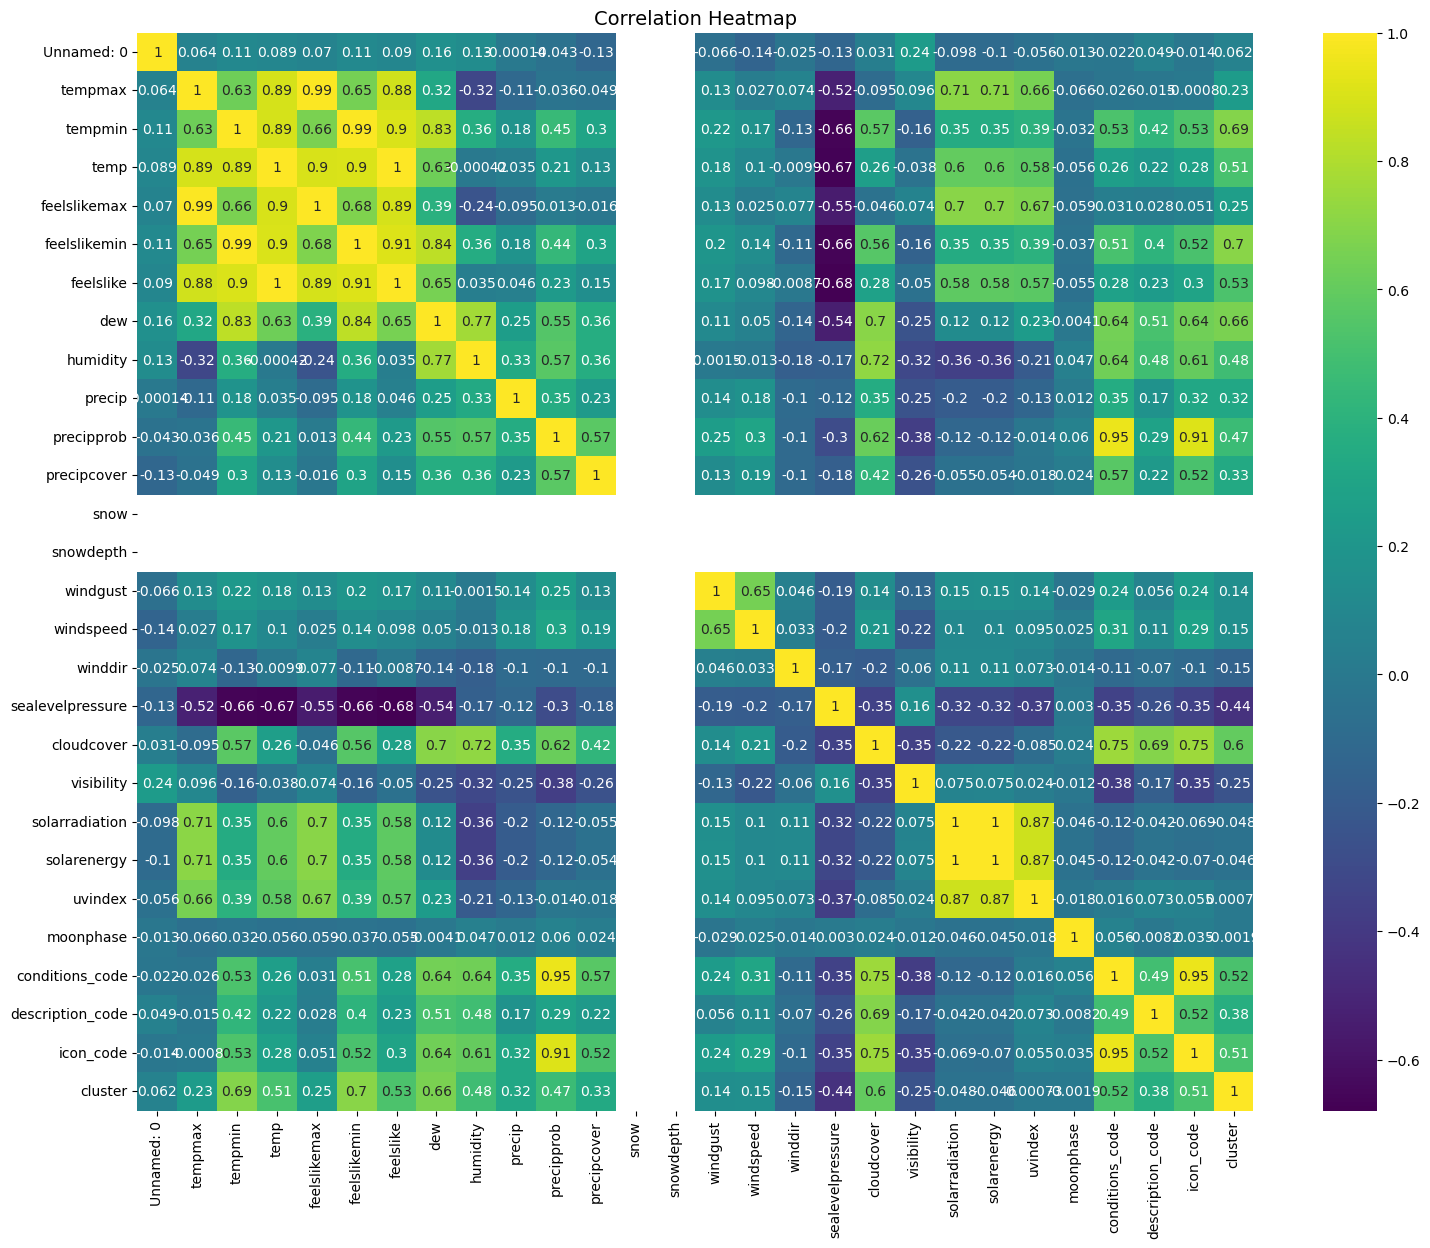

In [262]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

In [263]:
df.columns,df.shape

(Index(['Unnamed: 0', 'name', 'datetime', 'tempmax', 'tempmin', 'temp',
        'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
        'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust',
        'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
        'solarradiation', 'solarenergy', 'uvindex', 'sunrise', 'sunset',
        'moonphase', 'conditions', 'description', 'icon', 'stations',
        'conditions_code', 'description_code', 'icon_code', 'cluster'],
       dtype='object'),
 (983, 36))

In [264]:
#dropping columns with 0.60 correlation with other columns
df=df.drop(columns=['Unnamed: 0','sealevelpressure','precipcover','precip','moonphase','visibility','winddir','cluster'],axis=1)

In [265]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precipprob', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'cloudcover', 'solarradiation',
       'solarenergy', 'uvindex', 'sunrise', 'sunset', 'conditions',
       'description', 'icon', 'stations', 'conditions_code',
       'description_code', 'icon_code'],
      dtype='object')

In [266]:
df.shape

(983, 28)

In [267]:
rows_before = df.shape[0]
df = df.dropna()
rows_after = df.shape[0]

rows_before - rows_after

0

In [268]:
df.columns


Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precipprob', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'cloudcover', 'solarradiation',
       'solarenergy', 'uvindex', 'sunrise', 'sunset', 'conditions',
       'description', 'icon', 'stations', 'conditions_code',
       'description_code', 'icon_code'],
      dtype='object')

In [269]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns

# Drop non-numeric columns from the DataFrame
df_numeric = df[numeric_cols]
df_numeric

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precipprob,snow,snowdepth,windgust,windspeed,cloudcover,solarradiation,solarenergy,uvindex,conditions_code,description_code,icon_code
0,24.3,4.1,13.6,24.3,3.5,13.4,-4.0,36.7,0,0,0,24.1,9.3,0.0,162.7,13.8,7,0,13,0
1,25.0,4.8,14.5,25.0,3.9,14.4,-2.1,35.9,0,0,0,24.1,12.7,0.0,162.8,14.1,6,0,13,0
2,23.4,4.1,13.3,23.4,4.1,13.2,-0.3,44.1,0,0,0,14.7,8.6,0.0,170.2,14.6,7,0,13,0
3,23.8,2.8,12.7,23.8,2.8,12.5,-2.8,39.8,0,0,0,18.4,10.8,0.8,170.6,14.7,7,0,13,0
4,24.3,4.0,14.0,24.3,4.0,13.9,-2.2,37.5,0,0,0,20.7,20.5,3.8,168.7,14.5,7,0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,26.6,11.1,18.2,26.6,11.1,18.2,11.3,66.8,0,0,0,20.5,9.0,16.6,177.7,15.4,8,0,13,0
979,27.5,12.2,19.3,27.2,12.2,19.3,11.8,64.8,0,0,0,29.5,16.7,18.9,173.5,15.1,7,0,13,0
980,28.3,12.9,20.7,27.4,12.9,20.5,10.1,53.5,0,0,0,16.2,12.8,7.3,223.1,19.3,8,0,13,0
981,28.0,14.5,20.5,27.2,14.5,20.4,11.5,59.2,100,0,0,55.2,31.9,48.8,175.0,15.1,9,4,28,2


In [270]:
df_numeric.shape

(983, 20)

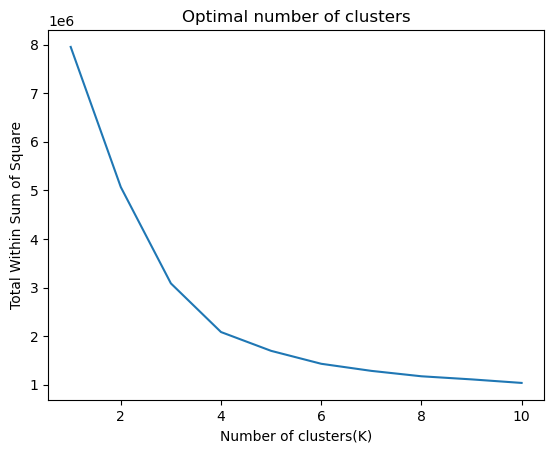

*From the chart we can see that the optimal number of k clusters is 4*


In [271]:
#finding the number of clusters using the Elbow method

import warnings
warnings.filterwarnings('ignore')

WSS=[]
clusters=range(1,11)

for cluster in clusters:
    kmeans=KMeans(n_clusters=cluster, random_state=None)
    kmeans=kmeans.fit(df_numeric)
    WSS.append(kmeans.inertia_)
    
plt.plot(clusters,WSS)
plt.xlabel("Number of clusters(K)")
plt.ylabel("Total Within Sum of Square")
plt.title("Optimal number of clusters")
plt.show()

print("*From the chart we can see that the optimal number of k clusters is 4*")

In [272]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
pca.fit(df_numeric)

df_pca_compenents = pd.DataFrame(
    data=pca.components_.round(2),
    columns=df_numeric.columns.values,
    index=['component 1','component 2']
)

df_pca_compenents

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precipprob,snow,snowdepth,windgust,windspeed,cloudcover,solarradiation,solarenergy,uvindex,conditions_code,description_code,icon_code
component 1,0.05,0.01,0.03,0.04,0.02,0.03,-0.01,-0.12,-0.28,-0.0,-0.0,0.02,0.00,-0.16,0.93,0.08,0.02,-0.01,-0.02,-0.00
component 2,0.02,0.06,0.04,0.02,0.06,0.04,0.08,0.15,0.86,-0.0,-0.0,0.08,0.04,0.31,0.32,0.03,0.01,0.03,0.07,0.01


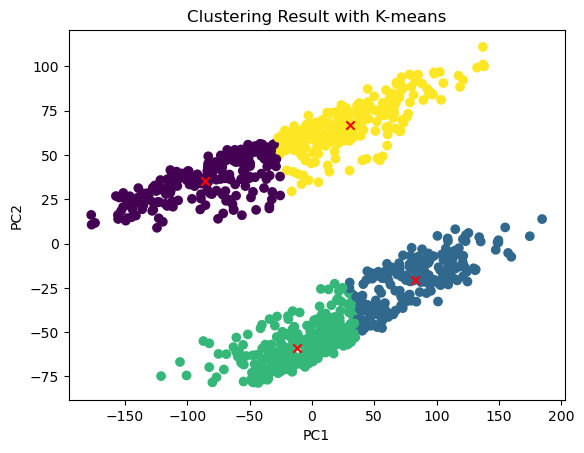

In [273]:

X=df_numeric

# Instantiate PCA with desired number of components
n_components = 2
pca = PCA(n_components=n_components)

# Fit PCA to the dataset
X_pca = pca.fit_transform(X)

# Initialize K-means clustering algorithm
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)

# Fit K-means to the reduced-dimensionality data
kmeans.fit(X_pca)

# Access the cluster labels assigned to each data point after clustering
labels = kmeans.labels_

# Plot the clustering result
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Result with K-means')
plt.show()


In [274]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5491975869640233


In [275]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
#davies_bouldin = davies_bouldin_score(X_pca, labels)
#print("Davies-Bouldin Index:", davies_bouldin)
